# Naive Bayes

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

In [32]:
# CSV dosyasını yüklüyoruz
df = pd.read_csv("wdbc.csv")

# Sütun adlarını manuel olarak tanımlıyoruz
df.columns = [
    "id", "diagnosis",
    "radius_mean", "texture_mean", "perimeter_mean", "area_mean",
    "smoothness_mean", "compactness_mean", "concavity_mean",
    "concave_points_mean", "symmetry_mean", "fractal_dimension_mean",
    "radius_se", "texture_se", "perimeter_se", "area_se",
    "smoothness_se", "compactness_se", "concavity_se",
    "concave_points_se", "symmetry_se", "fractal_dimension_se",
    "radius_worst", "texture_worst", "perimeter_worst", "area_worst",
    "smoothness_worst", "compactness_worst", "concavity_worst",
    "concave_points_worst", "symmetry_worst", "fractal_dimension_worst"
]


In [33]:
# id sütunu analizde kullanılmayacağı için silinir
df = df.drop("id", axis=1)

# diagnosis sütunu sayısallaştırılır: M=1 (kötü huylu), B=0 (iyi huylu)
df["diagnosis"] = df["diagnosis"].map({"M": 1, "B": 0})


In [34]:
# Korelasyon matrisini hesapla
corr_matrix = df.drop("diagnosis", axis=1).corr().abs()

# Üst üçgen (kendini tekrar etmeyen kısım)
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# %90’dan büyük korelasyona sahip sütunları bul
drop_cols = [column for column in upper.columns if any(upper[column] > 0.90)]

# Silinecek sütunları göster
print("Silinen sütunlar (%90+ korelasyonlu):", drop_cols)

# Sütunları veri setinden sil
df = df.drop(columns=drop_cols)


Silinen sütunlar (%90+ korelasyonlu): ['perimeter_mean', 'area_mean', 'concave_points_mean', 'perimeter_se', 'area_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'concave_points_worst']


In [35]:
X = df.drop("diagnosis", axis=1)  # Girdi verisi
y = df["diagnosis"]               # Hedef değişken


In [36]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [37]:
# Özelliklerin aynı düzeye çekilmesi
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [38]:
model = GaussianNB()
model.fit(X_train, y_train)


GaussianNB()

In [39]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Modelin doğruluk oranı: {accuracy:.4f}")


Modelin doğruluk oranı: 0.8947


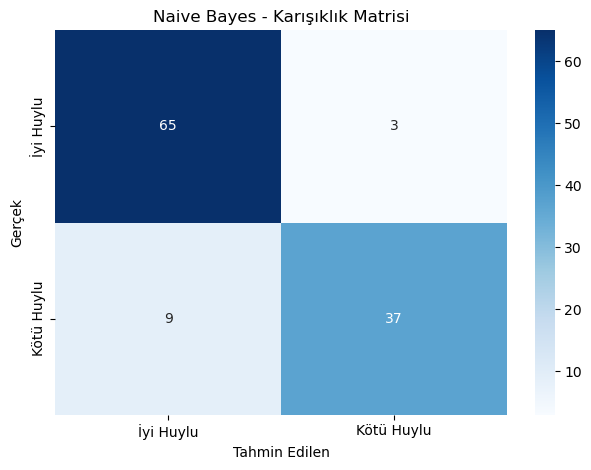

In [62]:
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["İyi Huylu", "Kötü Huylu"],
            yticklabels=["İyi Huylu", "Kötü Huylu"])
plt.xlabel("Tahmin Edilen")
plt.ylabel("Gerçek")
plt.title("Naive Bayes - Karışıklık Matrisi")
plt.tight_layout()
plt.show()


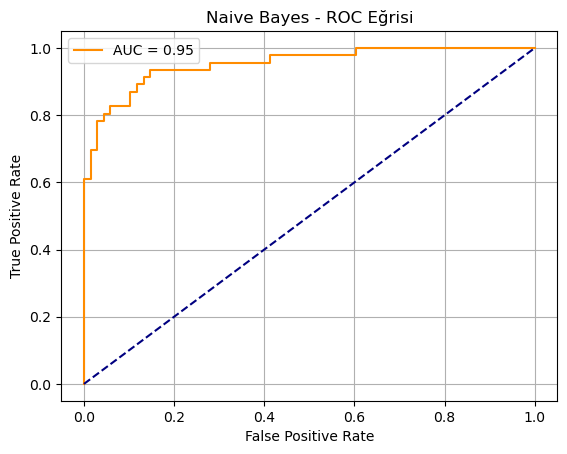

In [41]:
y_proba = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}", color="darkorange")
plt.plot([0, 1], [0, 1], linestyle="--", color="navy")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Naive Bayes - ROC Eğrisi")
plt.legend()
plt.grid()
plt.show()


In [42]:
print("Naive Bayes Sınıflandırma Raporu:\n")
print(classification_report(y_test, y_pred, target_names=["İyi Huylu", "Kötü Huylu"]))


Naive Bayes Sınıflandırma Raporu:

              precision    recall  f1-score   support

   İyi Huylu       0.88      0.96      0.92        68
  Kötü Huylu       0.93      0.80      0.86        46

    accuracy                           0.89       114
   macro avg       0.90      0.88      0.89       114
weighted avg       0.90      0.89      0.89       114

